In [ ]:
########### Exploratory Data Analysis (EDA)

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt2
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
import plotly.express as px 


In [3]:
#Load the data
dataLondon = pd.read_csv('London_House_Price_MonthWise.csv', parse_dates = ['date'])
dataLondon.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [4]:
#check the number of rows and columns in the dataset
dataLondon.shape

(13549, 7)

In [5]:
print ('The selected housing data has {} rows and {} columns.'.format(dataLondon.shape[0], dataLondon.shape[1]))

The selected housing data has 13549 rows and 7 columns.


In [6]:
#Get the important information about all the attributes in the dataset
dataLondon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


In [7]:
#finding whther there is any missing values in the dataset.
empy_dataLondon = dataLondon.isnull().sum().sort_values(ascending=False)
empty_values_percentage = (dataLondon.isnull().sum()/dataLondon.isnull().count()).sort_values(ascending = False)*100
empy_dataLondon = pd.concat([empy_dataLondon, empty_values_percentage], axis = 1 , keys = ['Total number of values missing', 'Percentage of values missing'])
print('Below are the details of values missing in the dataframe')
empy_dataLondon



Below are the details of values missing in the dataframe


,Total number of values missing,Percentage of values missing
no_of_crimes,6110,45.095579
houses_sold,94,0.693778
date,0,0.000000
area,0,0.000000
average_price,0,0.000000
code,0,0.000000
borough_flag,0,0.000000


In [8]:
# we have to drop the crimes column
dataLondon.drop('no_of_crimes', axis = 1, inplace = True)   


# fill NaN values in the houses_sold column with the mean 
dataLondon['houses_sold'].fillna(dataLondon.groupby('area')['houses_sold'].transform('mean'), inplace = True) 

In [9]:
# Extract the date from the datetime column for analysing the details based on year
dataLondon['year'] = dataLondon['date'].dt.year
dataLondon.iloc[[0, -1]]
print('The starting year in the dataset is Jan 1995 and the end year is Jan 2020. All the months in the year 2020 are not there in dataset. So we have to avoid the year.')
      
#Discard 2020 from the analysis
dataLondon = dataLondon[dataLondon['year'] < 2020]
dataLondon['year'].max()

The starting year in the dataset is Jan 1995 and the end year is Jan 2020. All the months in the year 2020 are not there in dataset. So we have to avoid the year.


2019

In [10]:
######################## Explore the Data

In [11]:
borough_count = dataLondon[dataLondon['borough_flag'] == 1]['area'].unique()
print('Total number of boroughs are: ' + str(len(borough_count)))

Total number of boroughs are: 33


In [13]:
#Here consider the regions which are outside of the London area
out_London= dataLondon[dataLondon['borough_flag'] == 0]['area'].nunique()

out_London_regions= dataLondon[dataLondon['borough_flag'] == 0]['area'].unique()

print('Total number of regions outside London are: ' + str(out_London))
print('Regions outside London are : ')
print(out_London_regions)

Total number of regions outside London are: 12
Regions outside London are : 
['south east' 'inner london' 'outer london' 'north east' 'north west'
 'yorks and the humber' 'east midlands' 'west midlands' 'east of england'
 'london' 'south west' 'england']


In [15]:
#Assign regions of England for comparing London and England

reg_Eng = ['south west', 'south east', 'east of england', 'west midlands', 'east midlands', 'yorks and the humber', 'north west', 'north east']
reg_Eng

['south west',
 'south east',
 'east of england',
 'west midlands',
 'east midlands',
 'yorks and the humber',
 'north west',
 'north east']

In [16]:
# Compare the England regions and 33 boroughs of London
bor_London = dataLondon[dataLondon['area'].isin(borough_count)]
reg_England = dataLondon[dataLondon['area'].isin(reg_Eng)]

In [18]:
#Calculate the mean value of the 'average price' column
london_avg_price_mean = bor_London.groupby('date')['average_price'].mean()
england_avg_price_mean = reg_England.groupby('date')['average_price'].mean()

In [67]:
#mean avaerage price
london_avg_price_mean

date
1995-01-01     81906.424242
1995-02-01     81527.969697
1995-03-01     81349.272727
1995-04-01     81432.515152
1995-05-01     82277.303030
                  ...      
2019-08-01    526506.393939
2019-09-01    528443.060606
2019-10-01    525602.666667
2019-11-01    522975.878788
2019-12-01    524032.787879
Name: average_price, Length: 300, dtype: float64

In [68]:
#mean average price of Englang region
england_avg_price_mean

date
1995-01-01     50042.000
1995-02-01     50135.500
1995-03-01     50087.375
1995-04-01     50441.875
1995-05-01     50534.750
                 ...    
2019-08-01    216696.750
2019-09-01    217066.750
2019-10-01    216545.625
2019-11-01    216036.250
2019-12-01    217193.375
Name: average_price, Length: 300, dtype: float64

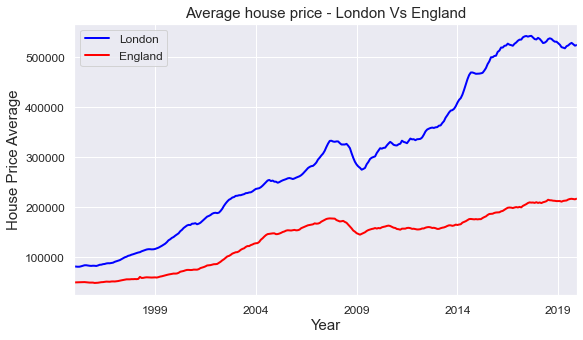

In [19]:

#Plot the average house prices in London 
font_size=15
plt2.figure(figsize = (9, 5))

london_avg_price_mean.plot(y = 'average_price', color = 'blue', lw = 2, label = 'London')
england_avg_price_mean.plot(y = 'average_price', color = 'red', lw = 2, label = 'England')

#plt2.axvspan('2007-12-21', '2009-06-21', alpha = 0.5, color = '#E57715')
#plt2.text(x = '2008-04-01', y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
#plt2.axvline(x = '2016-06-23', lw = 2, color = '#E57715', linestyle = '--')
#plt2.text(x = '2015-08-01', y = 210000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-2)

plt2.title('Average house price - London Vs England', size = font_size)
plt2.ylabel('House Price Average', size = font_size)
plt2.xticks(size = font_size - 3)
plt2.xlabel('Year', size = font_size)
plt2.yticks(size = font_size - 3)
plt2.legend(fontsize = font_size - 3);



In [20]:
#Finding the average house price of each boroughs in London 
london_borough_avg_price = bor_London.groupby('area')['average_price'].mean()
#lnd_top10_pr = lnd_b_prices.sort_values(ascending = False).to_frame()

#print ('\nThe 10 most expensive boroughs in London are:')
london_borough_avg_price


area
barking and dagenham      159382.250000
barnet                    304272.120000
bexley                    189097.030000
brent                     269830.480000
bromley                   253551.966667
camden                    466358.253333
city of london            422771.363333
croydon                   208818.630000
ealing                    273874.886667
enfield                   222571.710963
greenwich                 212457.663333
hackney                   284032.186047
hammersmith and fulham    442773.376667
haringey                  292017.106667
harrow                    268596.810000
havering                  204512.793333
hillingdon                232805.516667
hounslow                  235377.466667
islington                 364160.283333
kensington and chelsea    740606.683333
kingston upon thames      281016.553333
lambeth                   278574.123333
lewisham                  215948.826667
merton                    280543.440000
newham                    195068.83

In [21]:
#Find most expensive borough
london_borough_avg_price = bor_London.groupby('area')['average_price'].mean()
most_expensive_borough = london_borough_avg_price.sort_values(ascending = False).to_frame()

print ('\nThe most expensive boroughs in London:')
most_expensive_borough.head(10)



The most expensive boroughs in London:


,average_price
area,
kensington and chelsea,740606.683333
westminster,542282.063333
camden,466358.253333
hammersmith and fulham,442773.376667
city of london,422771.363333
richmond upon thames,381640.966667
islington,364160.283333
wandsworth,341411.026667
barnet,304272.120000


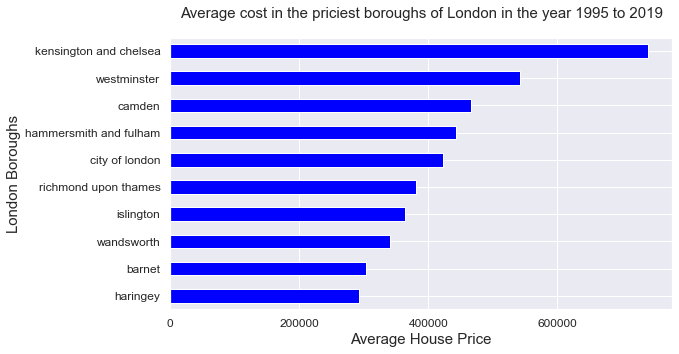

In [22]:
#Figure shows 

most_expensive_borough.head(10).sort_values(by = 'average_price', ascending = True).plot(kind = 'barh', figsize = (9, 5), 
                                                                               color = 'blue', 
                                                                               legend = False)

plt2.title('Average cost in the priciest boroughs of London in the year 1995 to 2019', size = font_size, y = 1.05)
plt2.ylabel('London Boroughs', size = font_size)
plt2.yticks(size = font_size - 3)
plt2.xlabel('Average House Price', size = font_size)
plt2.xticks([0, 200_000, 400_000, 600_000], size = font_size - 3);


<Figure size 648x360 with 0 Axes>

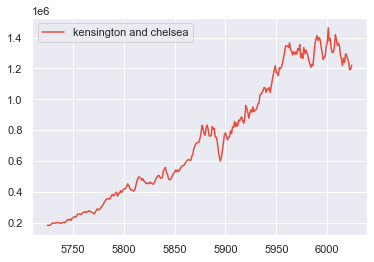

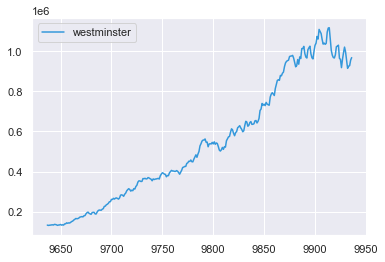

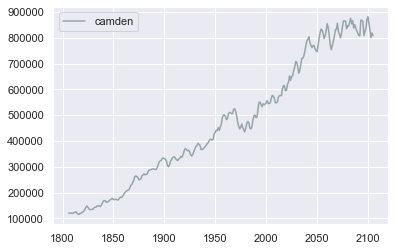

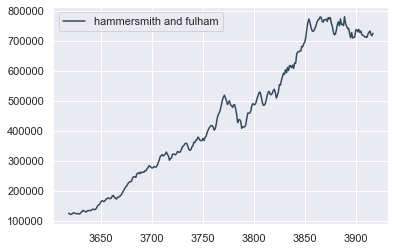

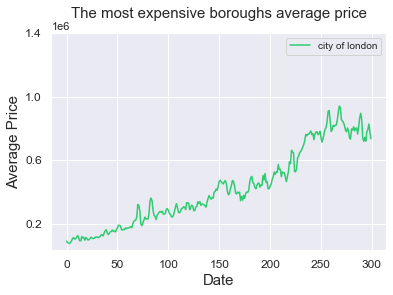

In [88]:
#The average price over the years in the five most costly boroughs


borough_top_5= most_expensive_borough.head().index
colors = ['#e74c3c', '#3498db', '#95a5a6', '#34495e', '#2ecc71']

plt2.figure(figsize = (9, 5))

for index, i in enumerate(borough_top_5):
    df_London = bor_London[bor_London['area'] == i]
    df_Lodon = df_London.groupby('date')['average_price'].mean()
    df_London.plot(y = 'average_price', label = i, color = colors[index])
       
plt2.title('The most expensive boroughs average price', y = 1.04, size = font_size)
plt2.xlabel('Date', size = font_size)
plt2.xticks(size = font_size - 3)
plt2.ylabel('Average Price', size = font_size)
plt2.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size = font_size - 3)
plt2.legend(fontsize = font_size - 5);



In [23]:
#Find the Most expensive regions in England

eng_reg_cost = reg_England.groupby('area')['average_price'].mean()
eng_reg_cost_top_3 = eng_reg_cost.sort_values(ascending = False).to_frame()

print('England - Most expensive regions')
eng_reg_cost_top_3.head(3)

England - Most expensive regions


,average_price
area,
south east,195653.013289
east of england,170796.173333
south west,163050.030000


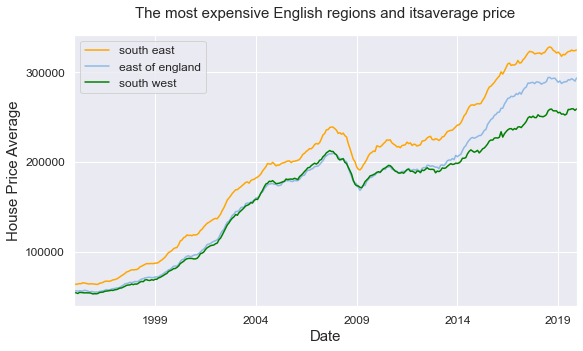

In [24]:
#show the most expensive english regions
top_3 = eng_reg_cost_top_3.head(3).index
colors = ['orange', '#8EB8E5', 'green', ]

plt2.figure(figsize = (9, 5))

for index, i in enumerate(top_3):
    eng_df = reg_England[reg_England['area'] == i]
    eng_df = eng_df.groupby('date')['average_price'].mean()
    eng_df.plot(y = 'average_price', label = i, color = colors[index])

plt2.title('The most expensive English regions and itsaverage price', size = font_size, y = 1.04)
plt2.xlabel('Date', size = font_size)
plt2.xticks(size = font_size - 3)
plt2.ylabel('House Price Average', size = font_size)
plt2.yticks([100_000, 200_000, 300_000], size = font_size - 3)
plt2.legend(fontsize = font_size - 3);



In [25]:
print('The South of England is home to Englands three most costly regions.')

The South of England is home to Englands three most costly regions.


In [26]:
london_borough_avg_price.tail(10)

area
merton                  280543.440000
newham                  195068.833333
redbridge               234482.226667
richmond upon thames    381640.966667
southwark               274245.890000
sutton                  216758.936667
tower hamlets           256610.438538
waltham forest          219622.146667
wandsworth              341411.026667
westminster             542282.063333
Name: average_price, dtype: float64

In [27]:
#Cheapest borough of London

cheapest_london_borough = bor_London.groupby('area')['average_price'].mean()
cheapest_london_borough = cheapest_london_borough.to_frame()

print ('\nThe cheapest boroughs in London:')
cheapest_london_borough.head(3)



The cheapest boroughs in London:


,average_price
area,
barking and dagenham,159382.25
barnet,304272.12
bexley,189097.03


Result: The prices of the most affordable boroughs in London are comparable to the most costly areas of England.


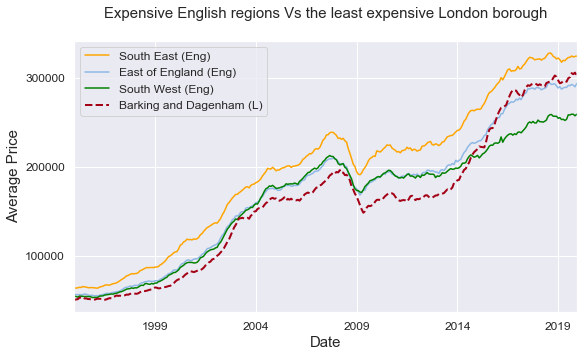

In [28]:
#Analyse the price of the cheapest borough with the regions in England
plt2.figure(figsize = (9, 5))

# loop region in England
for index, i in enumerate(top_3):
    eng_df = reg_England[reg_England['area'] == i]
    eng_df = eng_df.groupby('date')['average_price'].mean()
    eng_df.plot(y = 'average_price', label = i, color = colors[index])

    
#get cheapest region price
bor_Lon_Price = bor_London[bor_London['area'] == 'barking and dagenham'].groupby('date')['average_price'].mean()
bor_Lon_Price.plot(y = 'average_price', lw = 2, linestyle = '--', color = '#A30015', label = 'barking and dagenham')

#plot the graph
plt2.title('Expensive English regions Vs the least expensive London borough', size = font_size, y = 1.06)
plt2.xlabel('Date', size = font_size)
plt2.xticks(size = font_size - 3)
plt2.ylabel('Average Price', size = font_size)
plt2.yticks([0.1*1E+6, 0.2*1E+6, 0.3*1E+6], size = font_size - 3)
plt2.legend(labels = ['South East (Eng)', 'East of England (Eng)', 'South West (Eng)', 'Barking and Dagenham (L)'], 
           fontsize = font_size - 3);


print('Result: The prices of the most affordable boroughs in London are comparable to the most costly areas of England.')

In [ ]:
 ################## HOUSES SOLD IN LONDON

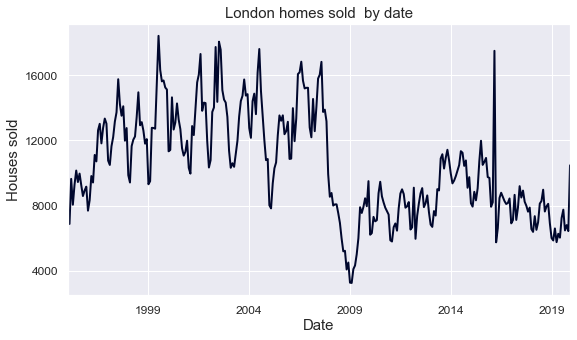

In [29]:

londonHouse = bor_London.groupby('date')['houses_sold'].sum()
londonHouse.plot(figsize = (9, 5), lw = 2, y = 'houses_sold', color = '#00072D')

#plt2.axvspan('2007-12-21', '2009-06-21', alpha = 0.5, color = '#F08700')
#plt2.text(x = '2008-04-01', y = 10700, s = 'Recession', rotation = 90, fontsize = font_size-2)
#plt2.axvspan('2016-01-1', '2016-05-01', alpha = 0.7, color = '#FFCAAF')

# plt.axvline(x = '2016-06-23', lw = 2, color = '#E57715', linestyle = '--')
#plt2.text(x = '2016-06-01', y = 10000, s = 'New tax legislation', rotation = 90, fontsize = font_size-2)

plt2.title('London homes sold  by date', size = font_size)
plt2.xlabel('Date', size = font_size)
plt2.xticks(size = font_size - 3)
plt2.ylabel('Houses sold', size = font_size)
plt2.yticks([4000, 8000, 12000, 16000], size = font_size - 3);

In [31]:
#find the boroughs hav highest sales
londonHouseB = bor_London.groupby('area')['houses_sold'].sum()
boroughTopFive = londonHouseB.sort_values(ascending = False).to_frame()
boroughTopFive.head(5)

,houses_sold
area,
wandsworth,164419.063545
bromley,149012.709030
croydon,146393.979933
barnet,134094.983278
lambeth,118347.491639


In [ ]:
#################END